**This is a sample machine learning implementation to demonstrate how we can apply a model to a recognized problem**

**1. Import Libraries**

In [16]:
# Import necessary libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

**2. Create a Sample Dataset**

Since I do not have access to the original dataset, I have created a sample dataset. Imagine that these data were generated using the different methods we discussed earlier

In [6]:
# Create sample dataset for McDonals

data = {
    'Month': pd.date_range(start='2020-01-01', periods=24, freq='ME'),
    'Product': ['Big Mac']*24,
    'Sales': np.random.randint(100, 500, size=24),
    'Price_per_Unit': np.random.uniform(1.5, 5.0, size=24),
    'Promotional_Activity': np.random.choice(['Yes', 'No'], size=24),
    'External_Factor': np.random.normal(loc=0.5, scale=0.1, size=24)
}

df = pd.DataFrame(data)
df.head()

,Month,Product,Sales,Price_per_Unit,Promotional_Activity,External_Factor
0,2020-01-31,Big Mac,208,3.886592,Yes,0.615652
1,2020-02-29,Big Mac,261,1.550791,No,0.622752
2,2020-03-31,Big Mac,406,1.904848,No,0.441716
3,2020-04-30,Big Mac,172,3.036506,Yes,0.477378
4,2020-05-31,Big Mac,305,4.457368,No,0.539051


In [8]:
# Check the shape of the dataset just to verufy

df.shape

(24, 6)

As we created it has 24 rows and 6 columns/ features

**3. Data Preprocessing**

Convert categorical data into numerical, handle missing values, and split the data into training and testing sets

In [10]:
# Use lable encoder from sklearn to convert categorical data into numerical

le = LabelEncoder()
df['Promotional_Activity'] = le.fit_transform(df['Promotional_Activity'])

In [11]:
# Splitting the dataset into two parts as train and test

X = df.drop(['Sales', 'Month', 'Product'], axis=1) # Drop unnecessary columns
y = df['Sales'] # Keep target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**4. Model Building**

Train a simple linear regression model as a baseline

In [13]:
# Training the model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Making predictions

predictions = model.predict(X_test)

In [15]:
# Evaluate the model

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 9179.74285791452


Generally, A smaller MSE indicates a closer fit to the data. Therefore, a model with an MSE of 0 perfectly predicts the target variable. Since this is sample data we can not expect the best model performance.

**5. Visualization of Predictions**

Plotting actual vs. predicted sales to visualize the model's performance

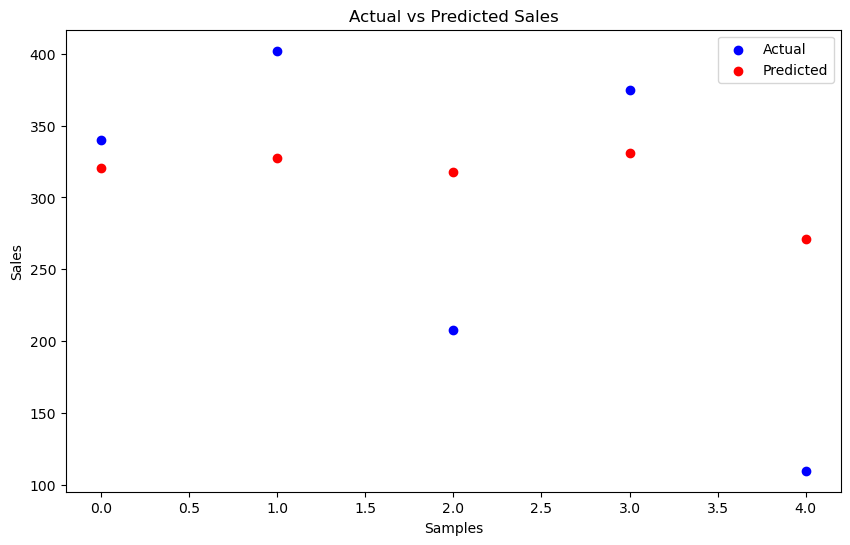

In [17]:
# Used matplotlib.pyplot to plot the data

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Samples')
plt.ylabel('Sales')
plt.legend()

There's a visible gap between the actual and predicted values in most samples. This suggests that while the model may be capturing the trend to some extent, there is room for improvement in accuracy.

**This simplified example sets up a basic framework for building a demand forecasting model using machine learning. In a real-world scenario, you would need to expand the dataset, experiment with more complex models (like Random Forest, Gradient Boosting, or even Deep Learning models), and conduct a thorough feature engineering and hyperparameter tuning process to optimize your predictions**